In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_excel('Train_data.xlsx', sheet_name='Train_data')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

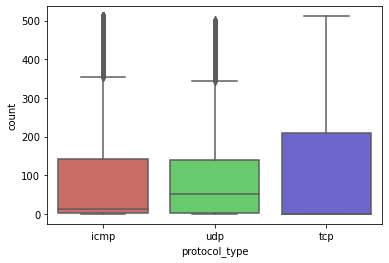

In [2]:
sb.boxplot(x = 'protocol_type', y = 'count', data=df, palette='hls')

<AxesSubplot:xlabel='xAttack', ylabel='count'>

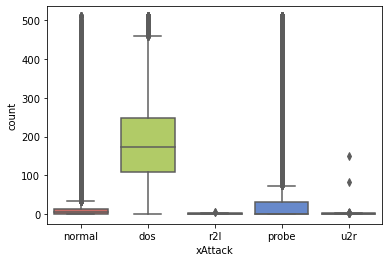

In [3]:
sb.boxplot(x = 'xAttack', y = 'count', data=df, palette='hls')

In [4]:
data = pd.read_excel('Train_data.xlsx', sheet_name='Values', header=None)
data.head()

,0,1
0,2,491
1,13,146
2,123,0
3,5,232
4,30,199


In [5]:
dataLength = len(data)

summ = np.sum(data, axis=0)
mean = summ/dataLength
mean

0       84.107555
1    45566.743000
dtype: float64

In [6]:
vr = np.sum((data - mean)**2, axis=0)
variance = vr/dataLength
variance

0    1.311212e+04
1    3.446051e+13
dtype: float64

In [7]:
var_dia = np.diag(variance)
var_dia

array([[1.31121171e+04, 0.00000000e+00],
       [0.00000000e+00, 3.44605146e+13]])

In [8]:
k = len(mean)
X = data - mean
prob = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
prob

0         1.830893e-10
1         1.952422e-10
2         2.234907e-10
3         1.864972e-10
4         2.117513e-10
              ...     
125968    1.618295e-10
125969    1.830892e-10
125970    1.819398e-10
125971    2.064926e-10
125972    1.819393e-10
Length: 125973, dtype: float64

In [9]:
#function to calculate probability

def probability(data):
    summ = np.sum(data, axis=0)
    dataLength = len(data)
    mean = summ/dataLength
    vr = np.sum((data - mean)**2, axis=0)
    variance = vr/dataLength
    var_dia = np.diag(variance)
    k = len(mean)
    X = data - mean
    prob = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return prob

In [10]:
cross_val = pd.read_excel('test_data.xlsx', sheet_name='test_data')
cross_val.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

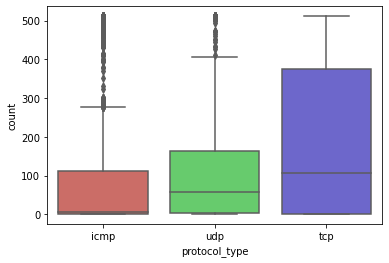

In [11]:
sb.boxplot(x = 'protocol_type', y = 'count', data=cross_val, palette='hls')

<AxesSubplot:xlabel='xAttack', ylabel='count'>

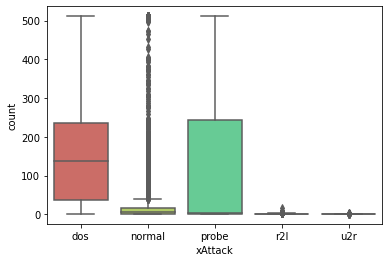

In [12]:
sb.boxplot(x = 'xAttack', y = 'count', data=cross_val, palette='hls')

In [13]:
cv = pd.read_excel('test_data.xlsx', sheet_name='Values', header=None)
cv.head()

,0,1
0,110,0
1,1,312
2,5,245
3,4,298
4,1,740


In [14]:
cross_val_y = pd.read_excel('test_data.xlsx', sheet_name='y')
cross_val_y.head()

,1
0,0
1,0
2,0
3,0
4,0


In [15]:
prob1 = probability(cv)

In [16]:
y = np.array(cross_val_y)

In [17]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [18]:
prob.describe()

count    1.259730e+05
mean     1.713820e-10
std      5.375415e-11
min      0.000000e+00
25%      1.819393e-10
50%      1.830892e-10
75%      1.994020e-10
max      2.367610e-10
dtype: float64

In [19]:
def classification(ep, prob):
    tp, fp, fn = 0, 0, 0
    for i in range(len(y)):
        if prob[i] <= ep and y[i][0] == 1:
            tp += 1
        elif prob[i] <= ep and y[i][0] == 0:
            fp += 1
        elif prob[i] > ep and y[i][0] == 1:
            fn += 1
    return tp, fp, fn

In [20]:
pl = [i for i in prob1 if i <= prob1.mean()]

In [21]:
len(pl)

2240

In [22]:
def f1(ep, prob):
    tp, fp, fn = classification(ep, prob)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2*precision*recall/(precision + recall)
    return f1

In [23]:
fs = []
for i in pl:
    fs.append(f1(i, prob1))
fs

[0.27707943300347687,
 0.26449864498644987,
 0.08994966715375873,
 0.07473251028806585,
 0.22250603093514967,
 0.11128775834658187,
 0.03487775688151821,
 0.1390092879256966,
 0.3187889581478183,
 0.23656215005599104,
 0.07473251028806585,
 0.2668649452480735,
 0.11128775834658187,
 0.19478058025951303,
 0.12368544969392561,
 0.15257857796765334,
 0.28620552836926333,
 0.22389117188607058,
 0.13304252998909488,
 0.22250603093514967,
 0.16498569923227455,
 0.1382088627207933,
 0.05830122298542469,
 0.19295424645519663,
 0.09576011607286797,
 0.06489184692179699,
 0.16199095022624435,
 0.2980994532673783,
 0.24972436604189635,
 0.3092969353592583,
 0.1143852978453739,
 0.09049626986701263,
 0.3184016289132095,
 0.22805532034998588,
 0.11384176312034247,
 0.2327477160927618,
 0.21864768683274022,
 0.2768406961178046,
 0.009791921664626682,
 0.3184016289132095,
 0.10749601275917064,
 0.17229023589131084,
 0.21864768683274022,
 0.24339360222531292,
 0.08142576847612819,
 0.06489184692179699

In [24]:
np.array(fs).argmin()

657

In [25]:
val = pl[657]
val

4.76849549222741e-11

In [26]:
label = []
for i in range(len(data)):
    if prob[i] >= val:
        label.append(0)
    else:
        label.append(1)
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
